---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')


from utils_yose import make_features, build_preprocessor, log_transform, outliers_detection, plot_feature_correlations, plot_hist_per_columns, QQPlot

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

---

In [116]:
train_data = "../../data/housing_data/train.csv"
test_data = "../../data/housing_data/test.csv"
df_train = pd.read_csv(train_data)

---

## Data Engineering

In [117]:
df_train = make_features(df_train)
proc = build_preprocessor(df_train)
df_train_processed = proc.fit_transform(df_train)
df_train_processed = pd.DataFrame(df_train_processed, columns=proc.get_feature_names_out())
df_train_processed['SalePrice'] = np.log1p(df_train['SalePrice'])

---

## Pre - Process data

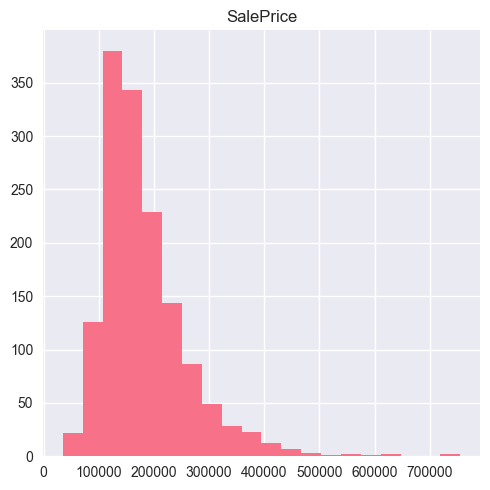

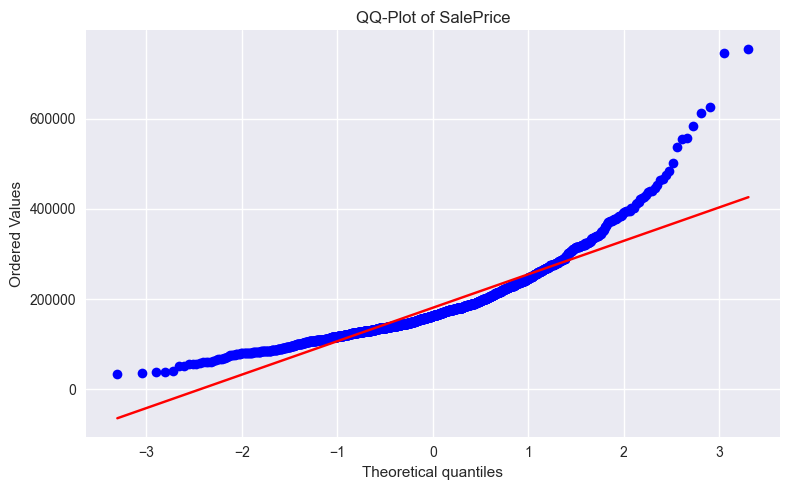

In [118]:
plot_hist_per_columns(df_train, 'SalePrice')
QQPlot(df_train['SalePrice'])

In [119]:
df_train['SalePrice'] = log_transform(df_train['SalePrice'])

---

### Post Log transform

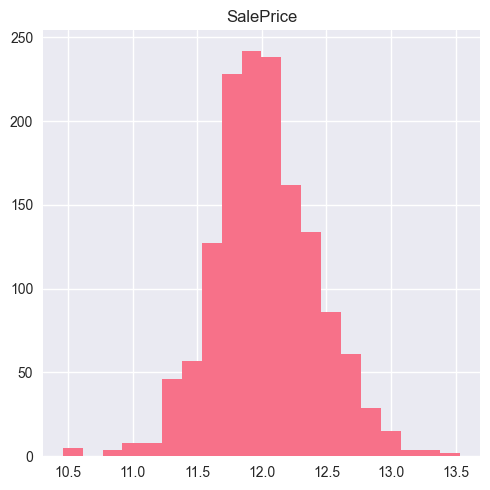

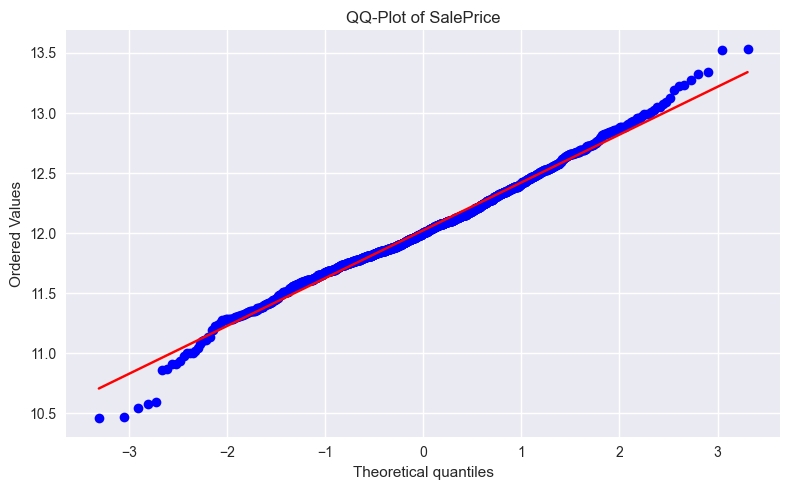

In [120]:
plot_hist_per_columns(df_train, 'SalePrice')
QQPlot(df_train['SalePrice'])

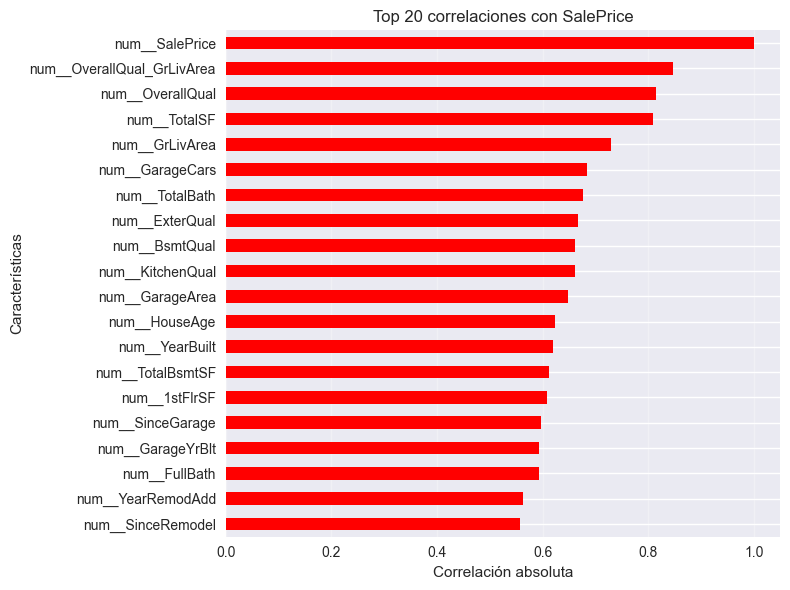

In [121]:
corr = df_train_processed.corr()['SalePrice'].sort_values(ascending=False).drop('SalePrice')
corr_abs = corr.abs().sort_values(ascending=False)
corr_abs_selected = corr_abs[corr_abs > 0.5]

plot_feature_correlations(df_train_processed.drop('SalePrice', axis=1), df_train_processed['SalePrice']);

---

## Outliers

In [122]:
for col in corr_abs_selected.index:
    outliers_vals = outliers_detection(df_train_processed[col])
    if outliers_vals:
        mask = df_train_processed[col].isin(outliers_vals)
        df_train_processed.loc[mask, col] = df_train_processed[col].median()

sp_outliers = outliers_detection(df_train['SalePrice'])
if sp_outliers:
    sp_mask = df_train_processed['SalePrice'].isin(sp_outliers)
    df_train_processed.loc[sp_mask, 'SalePrice'] = df_train_processed['SalePrice'].median()

print("Outliers encontrados y tratados con la mediana.")

Outliers encontrados y tratados con la mediana.


In [124]:
print("Mean of SalesPrice:",float(np.exp(df_train_processed['SalePrice']).mean()))
print("Standard Deviation of SalesPrice:",float(np.exp(df_train_processed['SalePrice']).std()))

Mean of SalesPrice: 180922.19589041095
Standard Deviation of SalesPrice: 79442.5028828866


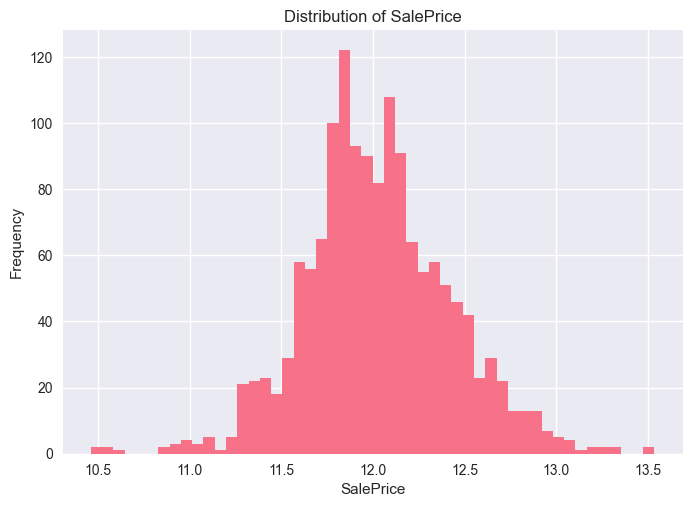

In [125]:
# graph the distribution of SalePrice
df_train_processed['SalePrice'].hist(bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

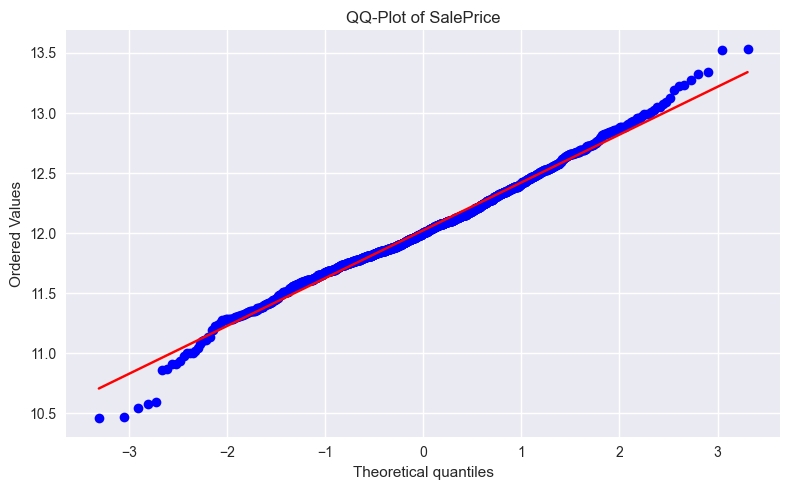

In [126]:
QQPlot(df_train_processed['SalePrice'])

---